In [91]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt



In [92]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [113]:

#x = train[['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']]
x = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
x = x.fillna(x.mean())
y = train['SalePrice']
y = y.fillna(x.mean())
s = sample['SalePrice']
#traing = test[['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']]
traing = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
traing = traing.fillna(traing.mean())



In [114]:
reg = linear_model.LinearRegression()
reg.fit(x,y)
pred = reg.predict(traing)
prediction = pd.DataFrame({'Actual':s.values,'Predicted':pred.squeeze()})
prediction


,Actual,Predicted
0,169277.052498,120100.812977
1,187758.393989,139898.208279
2,183583.683570,202611.414586
3,179317.477511,199859.871426
4,150730.079977,192059.204300
...,...,...
1454,167081.220949,113813.579125
1455,164788.778231,113813.579125
1456,219222.423400,100482.394785
1457,184924.279659,100386.048506


In [115]:
mse = mean_squared_error(s,pred)
mae = mean_absolute_error(s,pred)
print('Mean Squared error - ',mse)
print('Mean Absolute error - ',mae)
r = r2_score(s,pred)
print('R2 Score - ',r)

Mean Squared error -  2935238144.6028953
Mean Absolute error -  43880.67157287045
R2 Score -  -9.764906235243053


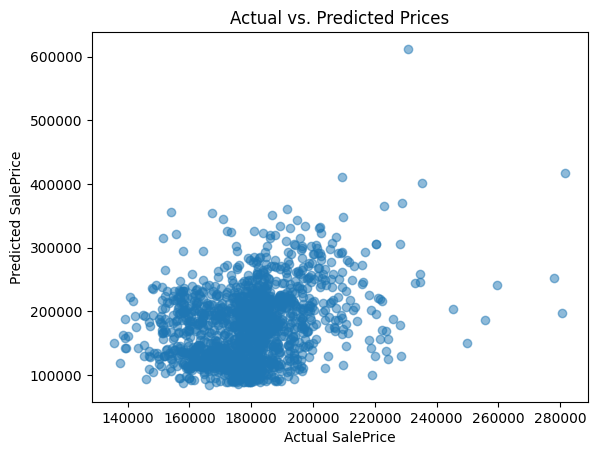

In [116]:
plt.scatter(s, pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted Prices")
plt.show()